## IMPORTANTO OS DADOS

In [130]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Aumenta a largura máxima da exibição
pd.set_option('display.max_colwidth', None)  # Evita truncar o conteúdo das colunas

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

df_raw = pd.read_json(url)

df_raw.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}","{'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}"
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9}","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}","{'Contract': 'Month-to-month', 'PaperlessBilling': 'No', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 59.9, 'Total': '542.4'}}"
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 4}","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'Yes', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'No'}","{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'Charges': {'Monthly': 73.9, 'Total': '280.85'}}"
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 13}","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'Yes', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'Yes'}","{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'Charges': {'Monthly': 98.0, 'Total': '1237.85'}}"
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 3}","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}","{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 83.9, 'Total': '267.4'}}"


In [131]:
df_raw.shape

(7267, 6)

In [132]:
## Transformando a base em df pandas para ser manipulada

# 1. Normalizar as colunas aninhadas
df_customer = pd.json_normalize(df_raw['customer'])
df_phone = pd.json_normalize(df_raw['phone'])
df_internet = pd.json_normalize(df_raw['internet'])

# ✅ Aqui a gente já extrai os campos internos de Charges diretamente
df_account = pd.json_normalize(df_raw['account'], sep='_')

# Renomear para facilitar a leitura
df_account.rename(columns={
    'Charges_Monthly': 'MonthlyCharges',
    'Charges_Total': 'TotalCharges'
}, inplace=True)

# 2. Juntar tudo em um único DataFrame
df_final = pd.concat(
    [
        df_raw[['customerID', 'Churn']],  # colunas principais
        df_customer,
        df_phone,
        df_internet,
        df_account
    ],
    axis=1
)

# 3. Ajustar tipos, se necessário
df_final['TotalCharges'] = pd.to_numeric(df_final['TotalCharges'], errors='coerce')

# Visualizar resultado
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


## TRATANDO OS DADOS

In [142]:
df_final.shape

(7043, 21)

In [170]:
df_final.dtypes

customerID           object
Churn                 int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
ContractDuration      int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Contas_Diarias      float64
dtype: object

In [135]:
df_final.value_counts('TotalCharges')

TotalCharges
20.20      11
19.75       9
19.55       9
19.90       9
19.65       8
           ..
8564.75     1
8594.40     1
8670.10     1
8672.45     1
8684.80     1
Name: count, Length: 6530, dtype: int64

In [136]:
df_final[df_final['gender'] == ''].head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


In [146]:
df_final.isnull().mean()*100

customerID          0.0
Churn               0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
ContractDuration    0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Contas_Diarias      0.0
dtype: float64

### Tratando dados faltantes

In [138]:
# A coluna TotalChargers continha dados faltantes quando o customer não tinha 1 mês de contrato ainda

df_final['TotalCharges'] = df_final['TotalCharges'].fillna(df_final['MonthlyCharges'])


In [139]:
# A coluna Churn possui linhas vazias
# Não foram encontradas correlações com as outras linhas e como representa uma pequena porcentagem (224/7267) do df e é a variável alvo vamos eliminar essas linhas

df_final = df_final[df_final['Churn'].isin(['Yes', 'No'])]

### Transformando os dados em binários

In [140]:
# Colunas a serem transformadas:
# gender
# Partner
# Dependents
# PhoneService
# PaperlessBilling 

df_final['gender'] = df_final['gender'].map({'Male': 1, 'Female': 0})
df_final['Partner'] = df_final['Partner'].map({'Yes': 1, 'No': 0})
df_final['Dependents'] = df_final['Dependents'].map({'Yes': 1, 'No': 0})
df_final['PhoneService'] = df_final['PhoneService'].map({'Yes': 1, 'No': 0})
df_final['PaperlessBilling'] = df_final['PaperlessBilling'].map({'Yes': 1, 'No': 0})

# Variável alvo: 
df_final['Churn'] = df_final['Churn'].map({'Yes': 1, 'No': 0})


### Transformando o nome das colunas

In [141]:
# Colunas a mudarem de nome:
# tenure

df_final.rename(columns={'tenure': 'ContractDuration'}, inplace=True)

### Criando novas colunas

In [145]:
df_final['Contas_Diarias'] = df_final['MonthlyCharges'] / 30


In [147]:
df_clean = df_final

# ANÁLISE EXPLORATÓRIA

### Análise descritiva

In [148]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   int64  
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   ContractDuration  7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [149]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,7043.0,0.265370,0.441561,0.000000,0.000000,0.000,1.000,1.000000
gender,7043.0,0.504756,0.500013,0.000000,0.000000,1.000,1.000,1.000000
SeniorCitizen,7043.0,0.162147,0.368612,0.000000,0.000000,0.000,0.000,1.000000
Partner,7043.0,0.483033,0.499748,0.000000,0.000000,0.000,1.000,1.000000
Dependents,7043.0,0.299588,0.458110,0.000000,0.000000,0.000,1.000,1.000000
ContractDuration,7043.0,32.371149,24.559481,0.000000,9.000000,29.000,55.000,72.000000
PhoneService,7043.0,0.903166,0.295752,0.000000,1.000000,1.000,1.000,1.000000
PaperlessBilling,7043.0,0.592219,0.491457,0.000000,0.000000,1.000,1.000,1.000000
MonthlyCharges,7043.0,64.761692,30.090047,18.250000,35.500000,70.350,89.850,118.750000
TotalCharges,7043.0,2279.798992,2266.730170,18.800000,398.550000,1394.550,3786.600,8684.800000


In [150]:
df_clean.median(numeric_only=True)

Churn                  0.000
gender                 1.000
SeniorCitizen          0.000
Partner                0.000
Dependents             0.000
ContractDuration      29.000
PhoneService           1.000
PaperlessBilling       1.000
MonthlyCharges        70.350
TotalCharges        1394.550
Contas_Diarias         2.345
dtype: float64

In [151]:
# Para todas as colunas categóricas
for col in df_clean.select_dtypes(include='object').columns:
    print(f"\n{col} - Valores únicos:")
    print(df_clean[col].value_counts(normalize=True) * 100)



customerID - Valores únicos:
customerID
9995-HOTOH    0.014198
0002-ORFBO    0.014198
0003-MKNFE    0.014198
9970-QBCDA    0.014198
9968-FFVVH    0.014198
                ...   
0014-BMAQU    0.014198
0013-SMEOE    0.014198
0013-MHZWF    0.014198
0013-EXCHZ    0.014198
0011-IGKFF    0.014198
Name: proportion, Length: 7043, dtype: float64

MultipleLines - Valores únicos:
MultipleLines
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: proportion, dtype: float64

InternetService - Valores únicos:
InternetService
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: proportion, dtype: float64

OnlineSecurity - Valores únicos:
OnlineSecurity
No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: proportion, dtype: float64

OnlineBackup - Valores únicos:
OnlineBackup
No                     43.844952
Yes                    34.488144
No internet service    21.666903
Name:

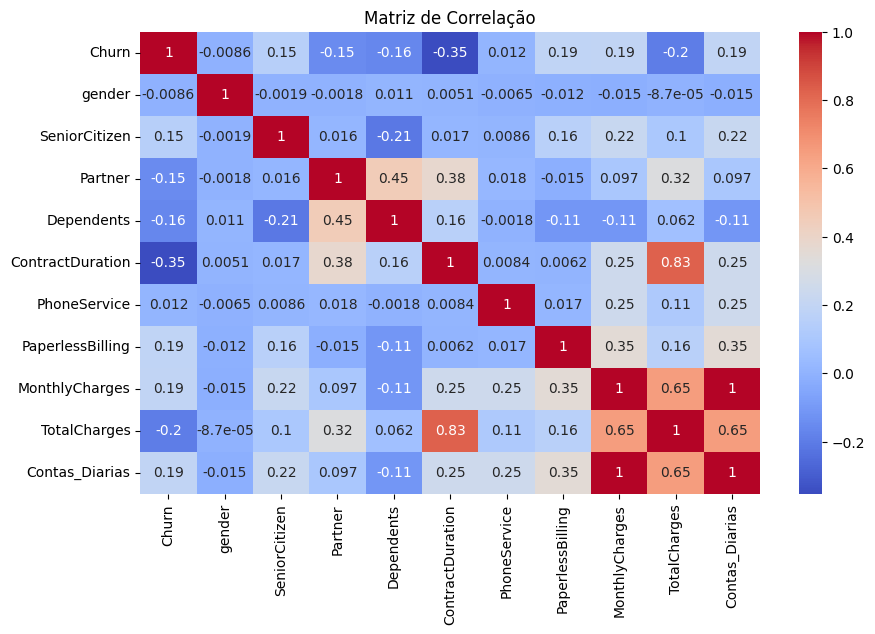

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

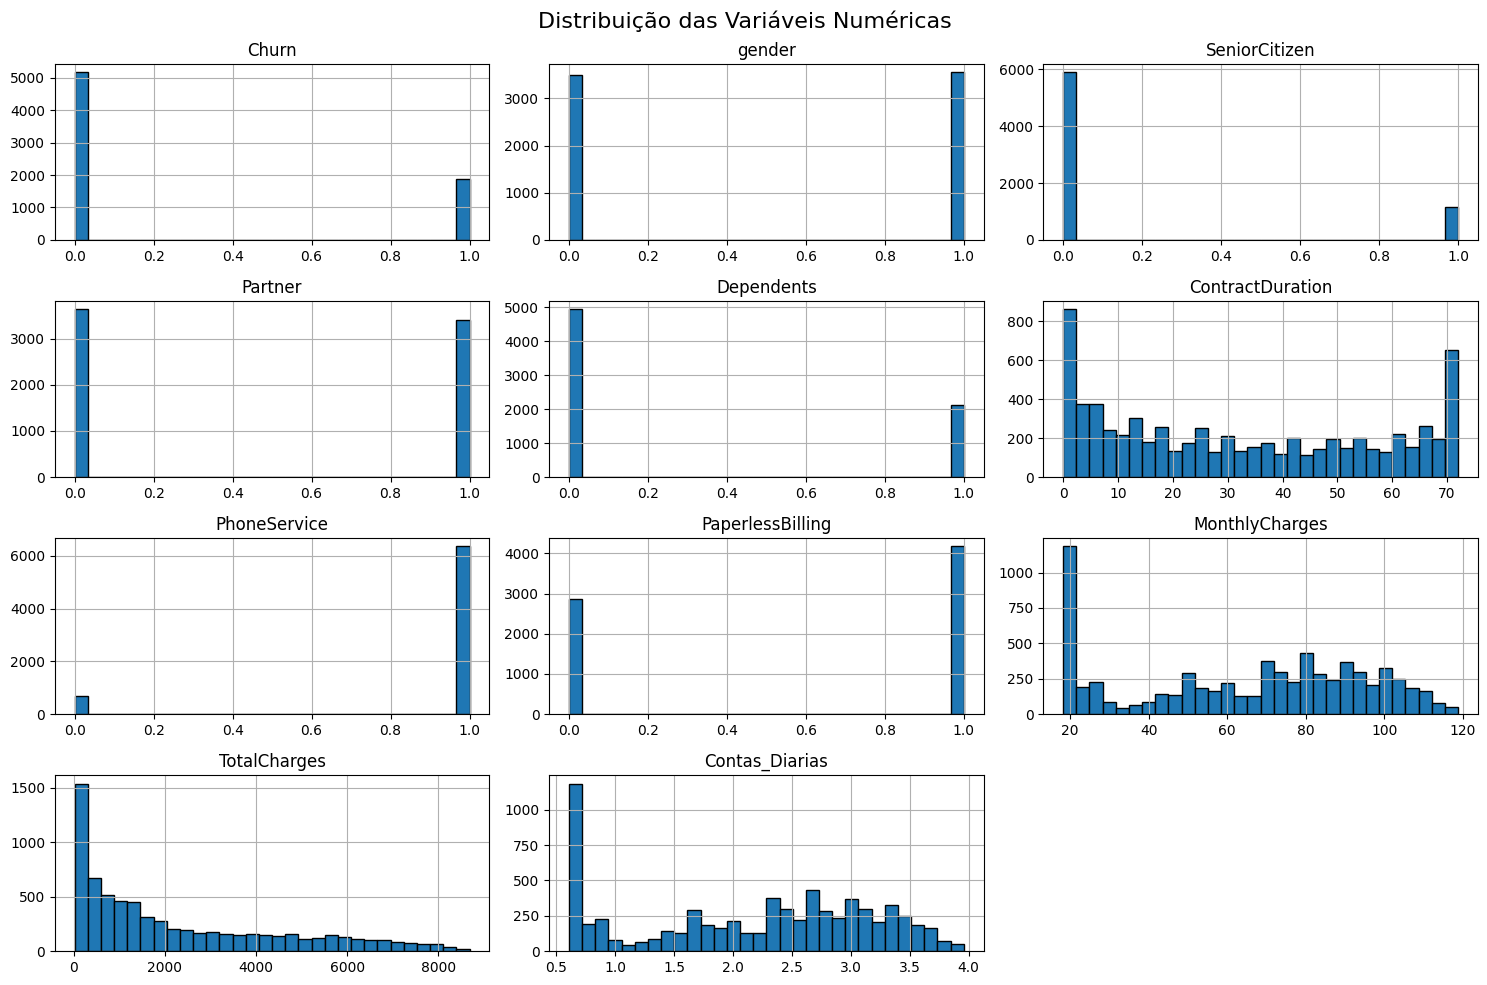

In [153]:
df_clean.hist(bins=30, figsize=(15,10), edgecolor='black')
plt.suptitle("Distribuição das Variáveis Numéricas", fontsize=16)
plt.tight_layout()
plt.show()

### Análise da variável alvo

C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\2605243056.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df_clean, palette='Set2')


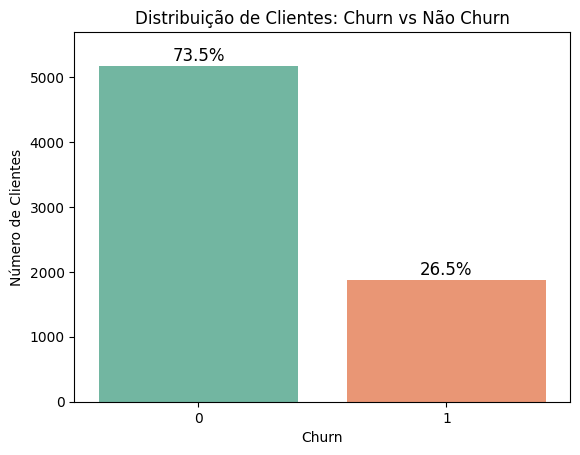

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contagem de valores
churn_counts = df_clean['Churn'].value_counts()
total = churn_counts.sum()

# Plot do gráfico de barras
ax = sns.countplot(x='Churn', data=df_clean, palette='Set2')

# Adiciona porcentagens no topo das barras
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    ax.text(p.get_x() + p.get_width() / 2, height + 20, percentage,
            ha='center', va='bottom', fontsize=12)

plt.title('Distribuição de Clientes: Churn vs Não Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.ylim(0, churn_counts.max() * 1.1)  # Ajuste no eixo Y para não cortar os textos
plt.show()



### Análise sobre variáveis categóricas

C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\3248896301.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=churn_percent, x=column, y='Churn_Rate', palette='coolwarm')


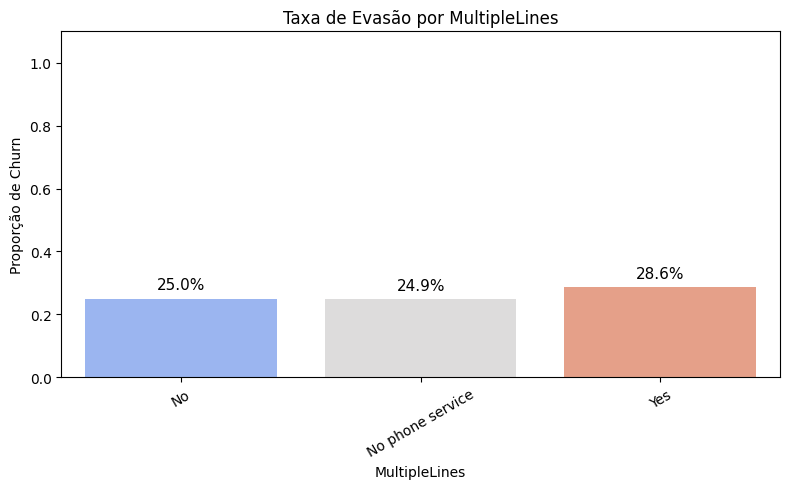

C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\3248896301.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=churn_percent, x=column, y='Churn_Rate', palette='coolwarm')


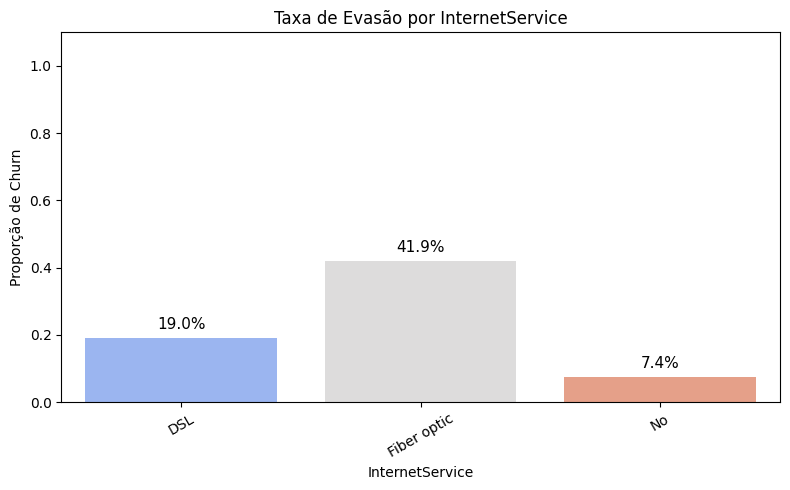

C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\3248896301.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=churn_percent, x=column, y='Churn_Rate', palette='coolwarm')


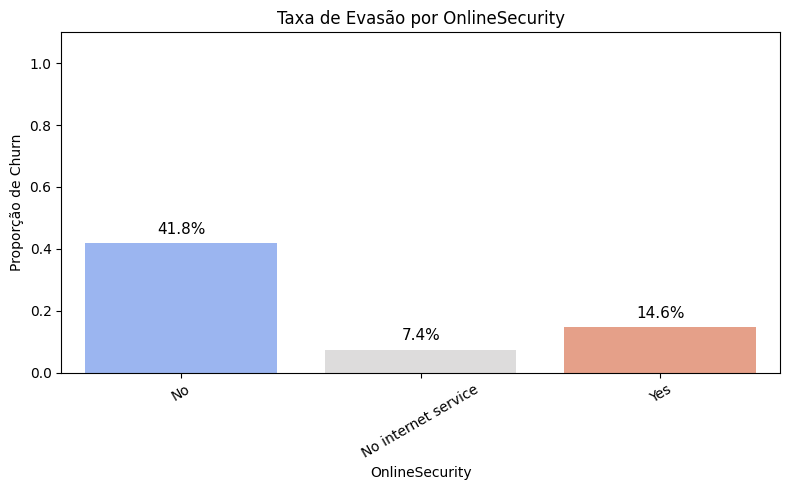

C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\3248896301.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=churn_percent, x=column, y='Churn_Rate', palette='coolwarm')


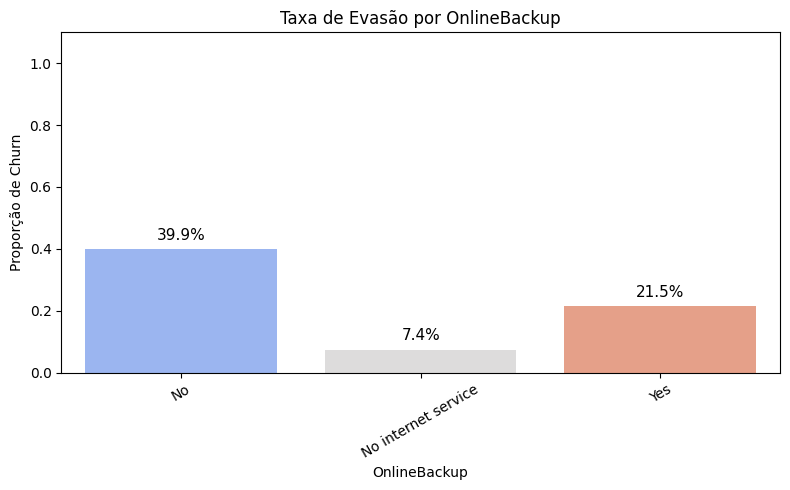

C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\3248896301.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=churn_percent, x=column, y='Churn_Rate', palette='coolwarm')


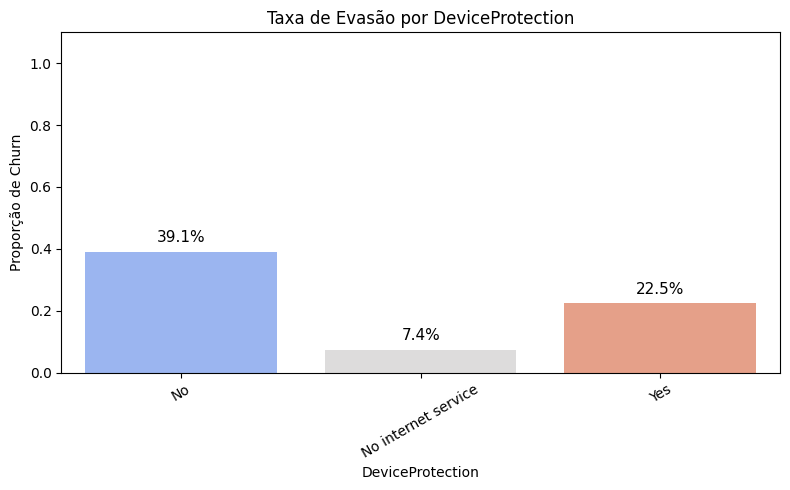

C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\3248896301.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=churn_percent, x=column, y='Churn_Rate', palette='coolwarm')


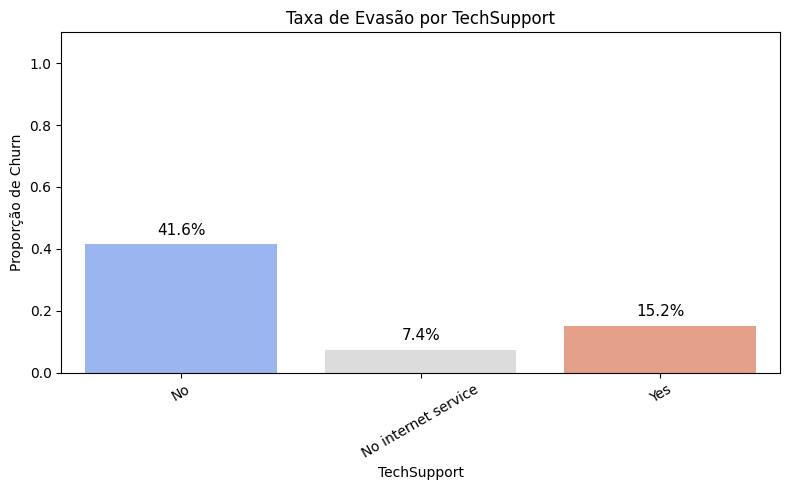

C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\3248896301.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=churn_percent, x=column, y='Churn_Rate', palette='coolwarm')


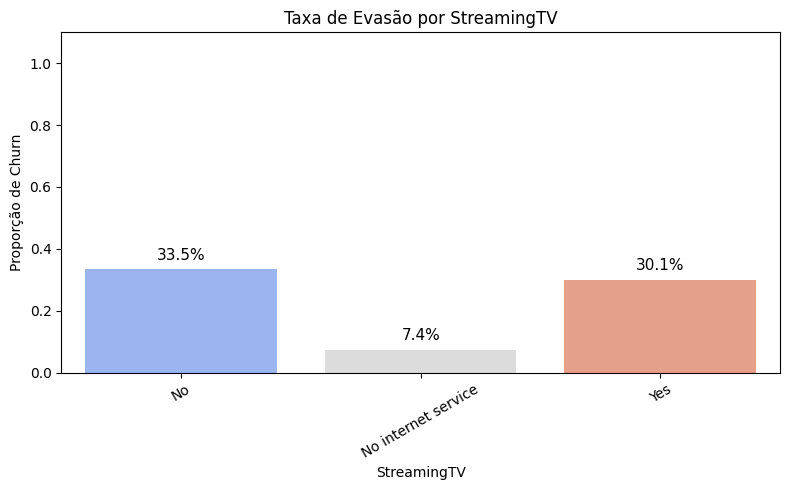

C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\3248896301.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=churn_percent, x=column, y='Churn_Rate', palette='coolwarm')


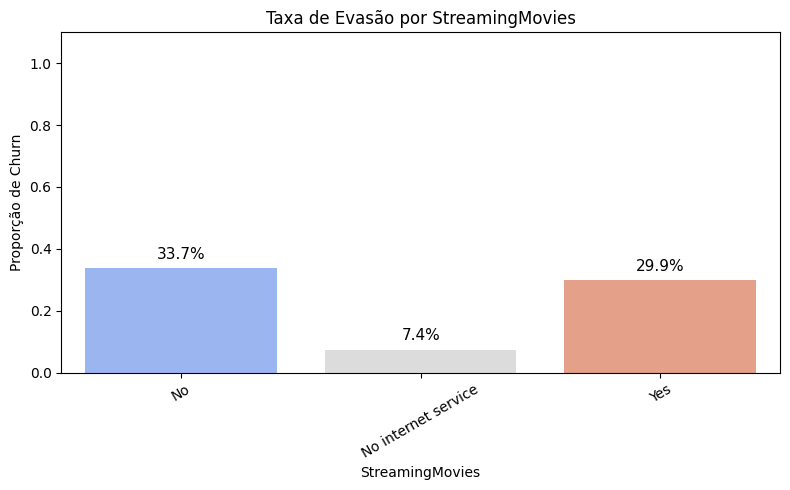

C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\3248896301.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=churn_percent, x=column, y='Churn_Rate', palette='coolwarm')


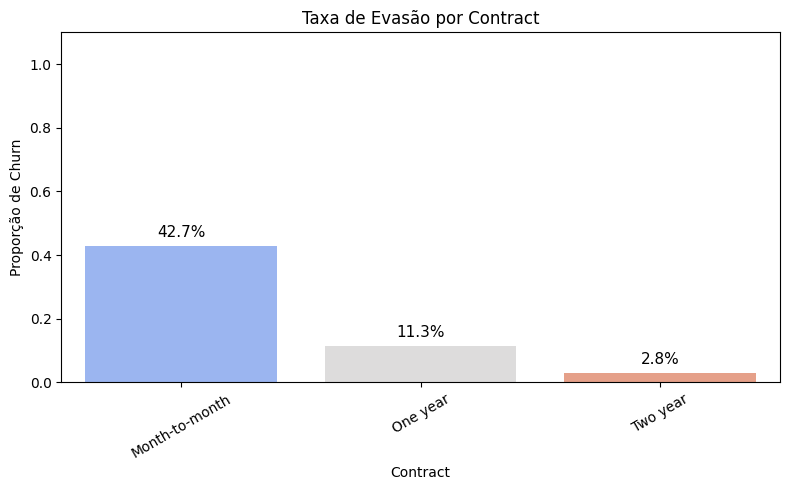

C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\3248896301.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=churn_percent, x=column, y='Churn_Rate', palette='coolwarm')


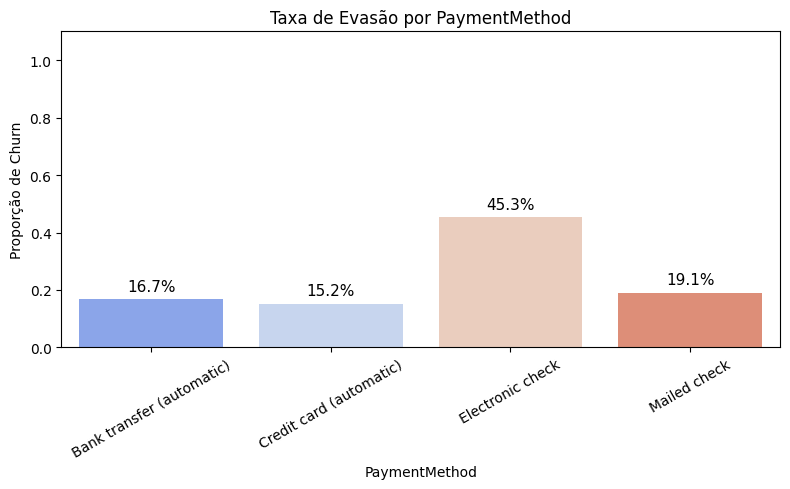

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_churn_percent_by_category(df, column):
    # Calcular a taxa de churn média por categoria
    churn_percent = (
        df.groupby(column)['Churn']
        .mean()
        .reset_index()
        .rename(columns={'Churn': 'Churn_Rate'})
    )

    plt.figure(figsize=(8, 5))
    ax = sns.barplot(data=churn_percent, x=column, y='Churn_Rate', palette='coolwarm')

    # Adicionar as porcentagens no topo de cada barra
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2,
                height + 0.02,
                f'{height:.1%}',
                ha='center', va='bottom', fontsize=11)

    plt.title(f'Taxa de Evasão por {column}')
    plt.ylabel('Proporção de Churn')
    plt.xlabel(column)
    plt.ylim(0, 1.1)  # Deixa espaço acima para o texto
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

# Colunas categóricas com poucos valores únicos
categorical_cols = [col for col in df_clean.select_dtypes(include='object').columns
                    if df_clean[col].nunique() <= 10]

# Gerar os gráficos para todas essas colunas
for col in categorical_cols:
    plot_churn_percent_by_category(df_clean, col)



### Análise das variáveis númericas

C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\1150706131.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y=col, palette='Set2')


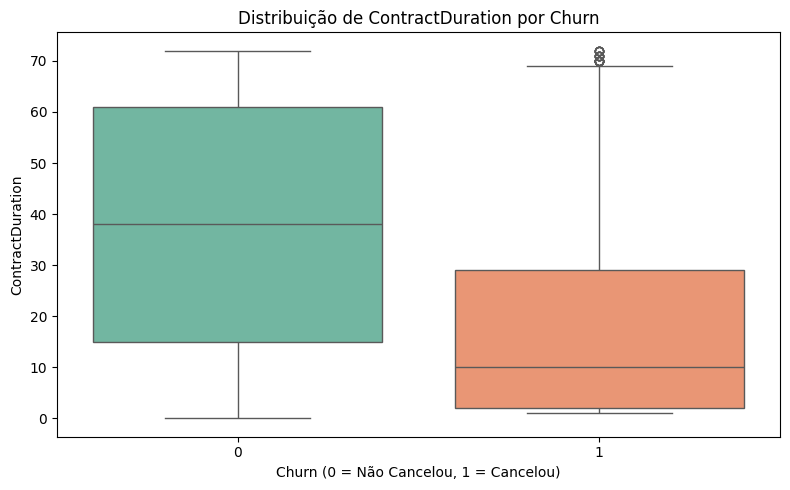

C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\1150706131.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y=col, palette='Set2')


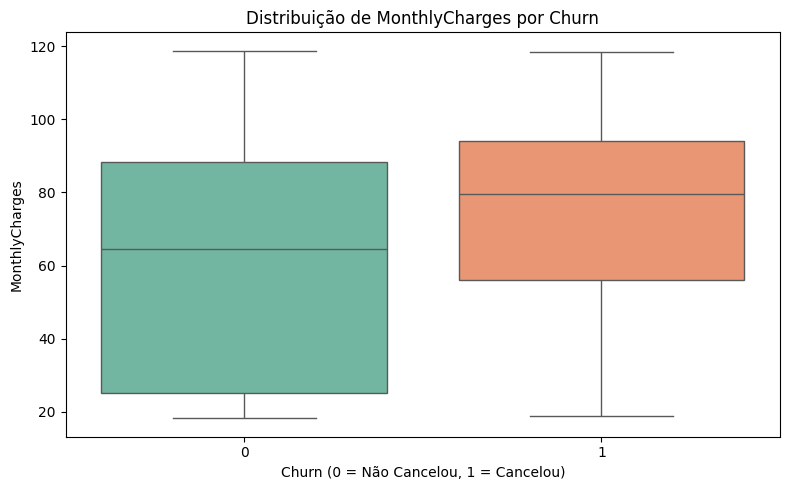

C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\1150706131.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y=col, palette='Set2')


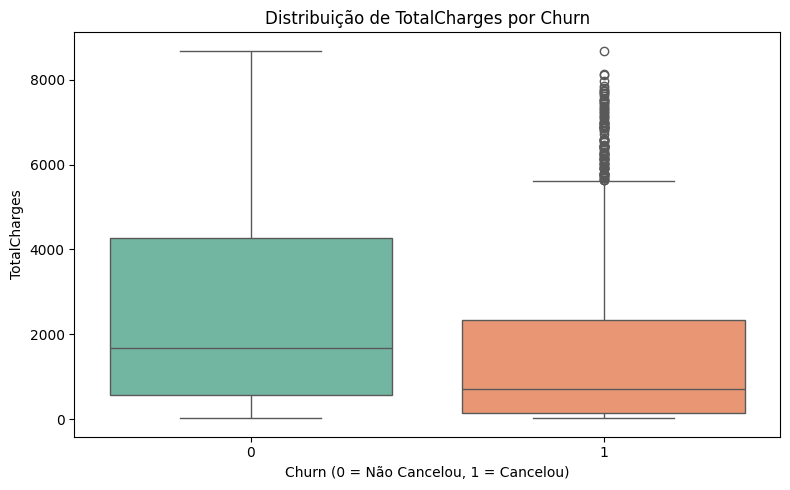

C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\1150706131.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y=col, palette='Set2')


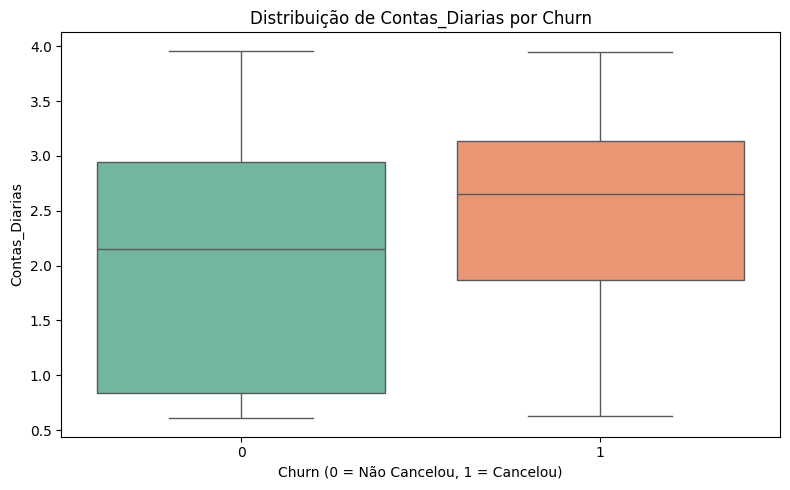

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

colunas_numericas = ['ContractDuration', 'MonthlyCharges', 'TotalCharges', 'Contas_Diarias']

for col in colunas_numericas:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_clean, x='Churn', y=col, palette='Set2')
    plt.title(f'Distribuição de {col} por Churn')
    plt.xlabel('Churn (0 = Não Cancelou, 1 = Cancelou)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()



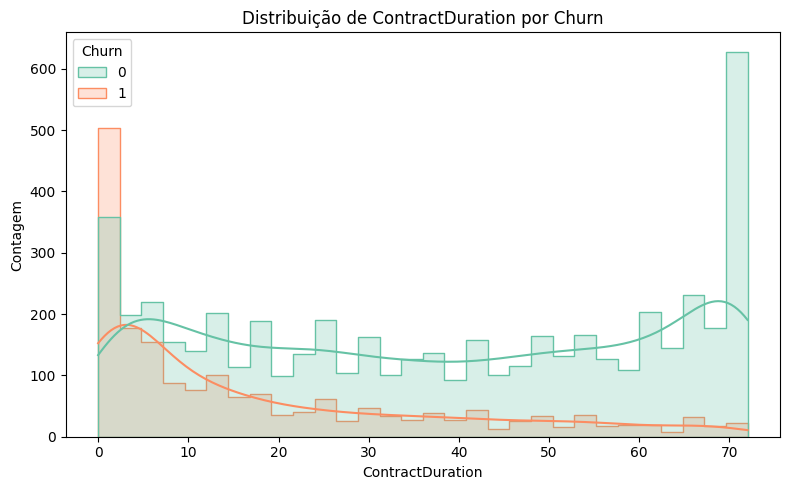

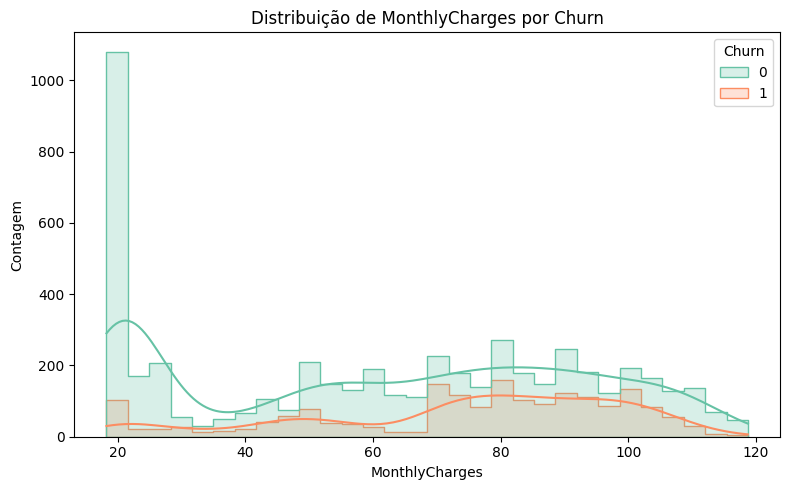

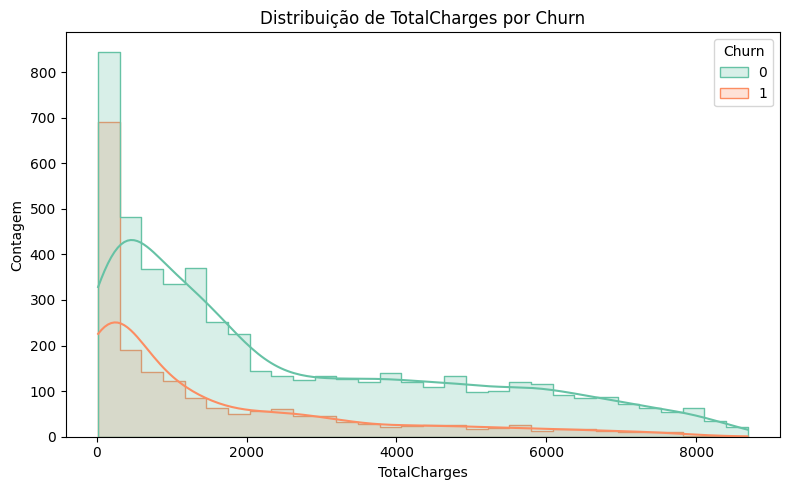

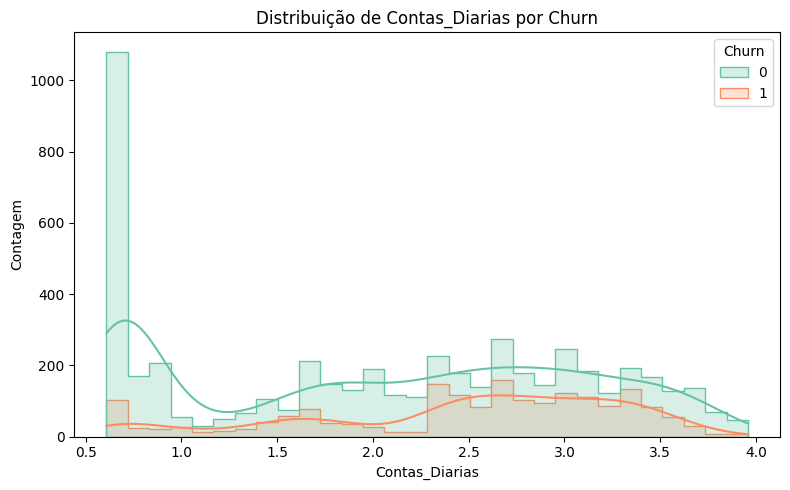

In [172]:
for col in colunas_numericas:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df_clean, x=col, hue='Churn', kde=True, bins=30, palette='Set2', element='step')
    plt.title(f'Distribuição de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.tight_layout()
    plt.show()

# Relatório de Análise de Evasão de Clientes (Churn)

## 1. Introdução

O objetivo desta análise é compreender os fatores que influenciam a evasão de clientes (`Churn`) em uma empresa de serviços. A evasão é um problema crítico, pois impacta diretamente a receita e a sustentabilidade do negócio. Entender o perfil dos clientes que cancelam seus serviços permite desenvolver estratégias para retenção e melhorias no atendimento.


## 2. Limpeza e Tratamento de Dados

- Importação dos dados a partir do arquivo JSON hospedado no GitHub.  
- A coluna `TotalCharges` continha dados faltantes para clientes que ainda não completaram 1 mês de contrato. Isso explica os valores ausentes e foi considerado no tratamento dos dados, substituindo esses valores faltantes pelos valores de `MonthlyCharges`.  
- A coluna `Churn` possuía algumas linhas vazias (224 linhas), que representam uma pequena parcela do total (224/7267). Como é a variável alvo, e não foi encontrada correlação relevante com essas linhas, optou-se por eliminar essas entradas para garantir a qualidade do modelo.  
- Algumas colunas foram transformadas para facilitar a análise:  
  - `gender`, `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling` foram convertidas para valores binários.  
  - A variável alvo `Churn` foi padronizada para 0 (No) e 1 (Yes).  
- A coluna `tenure` foi renomeada para `ContractDuration` para melhor clareza.  
- Ajustes em colunas categóricas, substituindo `"No phone service"` por `"No MultipleLines"` na coluna `MultipleLines`.  
- Criação da coluna `Contas_Diarias` como a divisão do valor mensal (`MonthlyCharges`) por 30, representando o gasto médio diário.  
- Algumas colunas categóricas apresentaram as seguintes distribuições relevantes:  

| Coluna           | Valores principais e %                                     |
|------------------|-----------------------------------------------------------|
| `InternetService`| Fiber optic (43.96%), DSL (34.37%), No (21.67%)           |
| `OnlineSecurity` | No (49.67%), Yes (28.67%), No internet service (21.67%)  |
| `OnlineBackup`   | No (43.84%), Yes (34.49%), No internet service (21.67%)  |
| `DeviceProtection`| No (43.94%), Yes (34.39%), No internet service (21.67%) |
| `TechSupport`    | No (49.31%), Yes (29.02%), No internet service (21.67%)  |
| `StreamingTV`    | No (39.90%), Yes (38.44%), No internet service (21.67%)  |
| `StreamingMovies`| No (39.54%), Yes (38.79%), No internet service (21.67%)  |
| `Contract`       | Month-to-month (55.02%), Two year (24.07%), One year (20.91%) |
| `PaymentMethod`  | Electronic check (33.58%), Mailed check (22.89%), Bank transfer (21.92%), Credit card (21.61%) |



## 3. Análise Exploratória de Dados

Nesta etapa, buscamos entender como as variáveis do conjunto de dados se relacionam com a evasão de clientes (Churn). Foram analisadas variáveis categóricas e numéricas para identificar padrões e grupos de clientes com maior probabilidade de cancelar o serviço.

### 3.1 Distribuição Geral de Churn

A primeira análise mostra a proporção de clientes que cancelaram o serviço (`Churn = 1`) em relação aos que permaneceram (`Churn = 0`). A taxa de churn observada é de aproximadamente **26%**, o que representa um alerta para estratégias de retenção.

### 3.2 Evasão por Variáveis Categóricas

Foi analisada a taxa de churn dentro de cada categoria das variáveis categóricas. Os principais achados foram:

- **Contrato Month-to-month** apresenta taxa de churn significativamente mais alta do que contratos anuais ou bienais.
- Clientes que **utilizam internet via fibra óptica (Fiber optic)** têm maior probabilidade de churn.
- A ausência de serviços como **OnlineSecurity, OnlineBackup, DeviceProtection e TechSupport** está associada a maior evasão.
- O método de pagamento **Electronic check** é o que mais concentra cancelamentos, comparado a transferências automáticas ou cartão de crédito.

Essas variáveis estão **acima da média geral de churn (26%)**, indicando que contribuem fortemente para elevar a taxa de cancelamento.

### 3.3 Evasão por Variáveis Numéricas

As variáveis numéricas foram comparadas entre clientes que cancelaram e os que permaneceram:

- **ContractDuration (tempo de contrato)**: clientes com menos tempo de permanência tendem a cancelar mais. Muitos churns ocorrem nos primeiros meses.
- **MonthlyCharges**: clientes com cobranças mensais mais altas apresentam maior evasão.
- **TotalCharges**: clientes que gastaram menos ao longo do tempo (em geral, mais novos) cancelam com mais frequência.
- **Contas_Diarias** (gasto médio por dia): também se mostra mais elevado entre os que cancelam, o que reforça que o custo percebido tem papel importante na decisão de saída.

Esses padrões sugerem que tanto **o custo percebido** quanto **a falta de vínculo com a empresa** (tempo curto de contrato) são fatores de risco para evasão.

Gráficos de boxplot e histogramas foram usados para evidenciar essas diferenças entre os grupos churners e não churners.


C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\3019735881.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df_clean, palette='Set2')


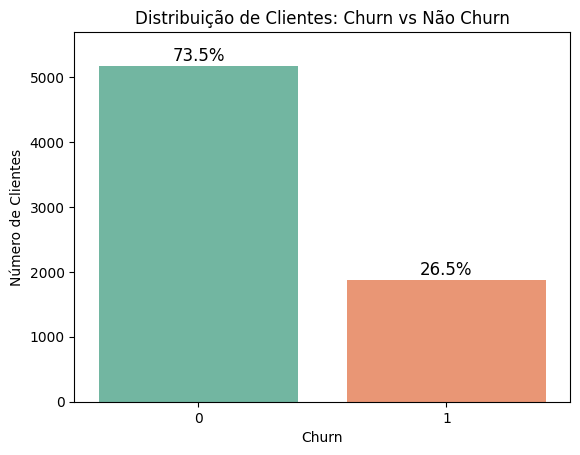

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contagem de valores
churn_counts = df_clean['Churn'].value_counts()
total = churn_counts.sum()

# Plot do gráfico de barras
ax = sns.countplot(x='Churn', data=df_clean, palette='Set2')

# Adiciona porcentagens no topo das barras
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    ax.text(p.get_x() + p.get_width() / 2, height + 20, percentage,
            ha='center', va='bottom', fontsize=12)

plt.title('Distribuição de Clientes: Churn vs Não Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.ylim(0, churn_counts.max() * 1.1)  # Ajuste no eixo Y para não cortar os textos
plt.show()


C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\3397064454.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=churn_percent, x=column, y='Churn_Rate', palette='coolwarm')


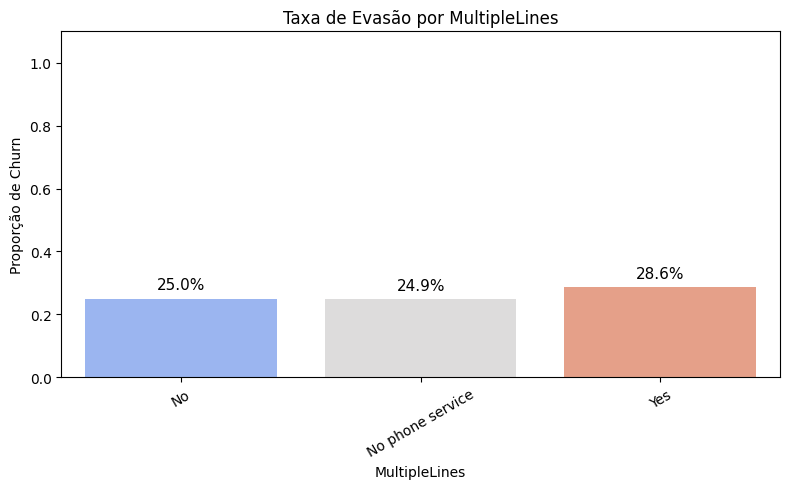

C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\3397064454.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=churn_percent, x=column, y='Churn_Rate', palette='coolwarm')


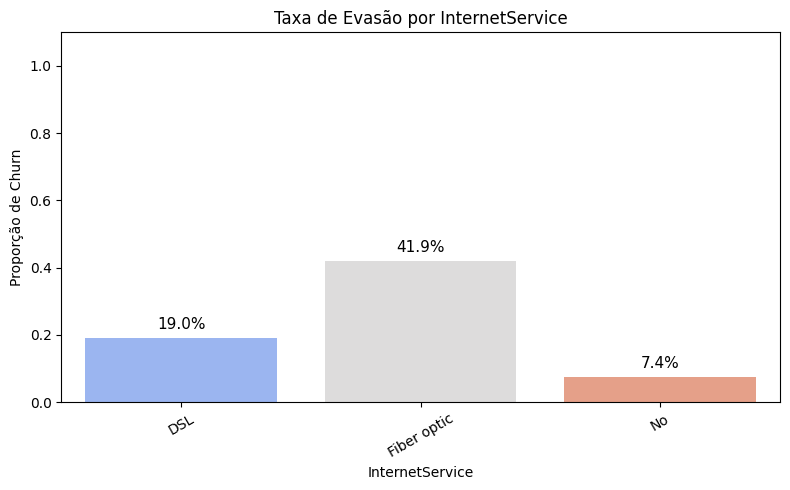

C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\3397064454.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=churn_percent, x=column, y='Churn_Rate', palette='coolwarm')


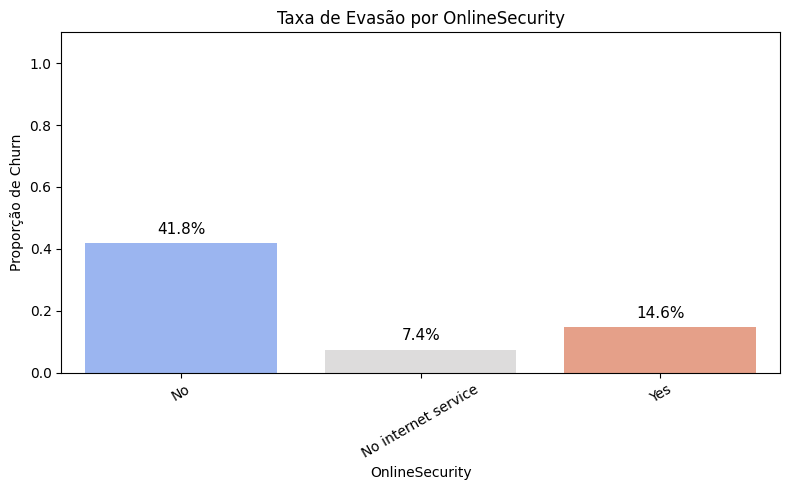

C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\3397064454.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=churn_percent, x=column, y='Churn_Rate', palette='coolwarm')


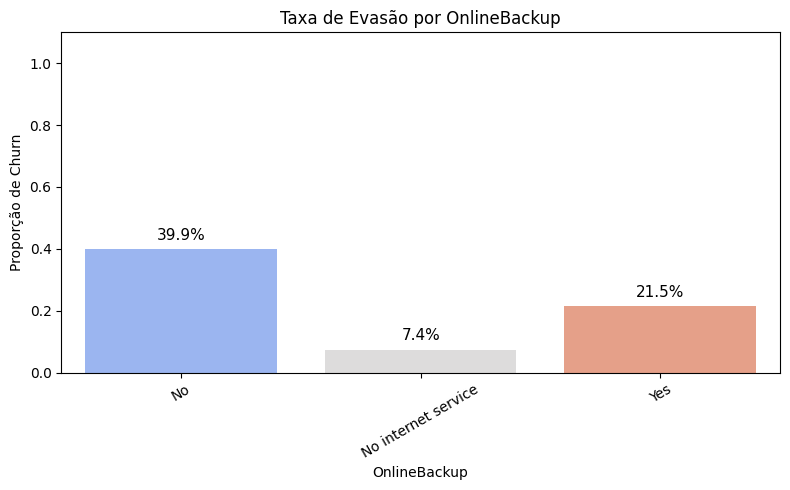

C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\3397064454.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=churn_percent, x=column, y='Churn_Rate', palette='coolwarm')


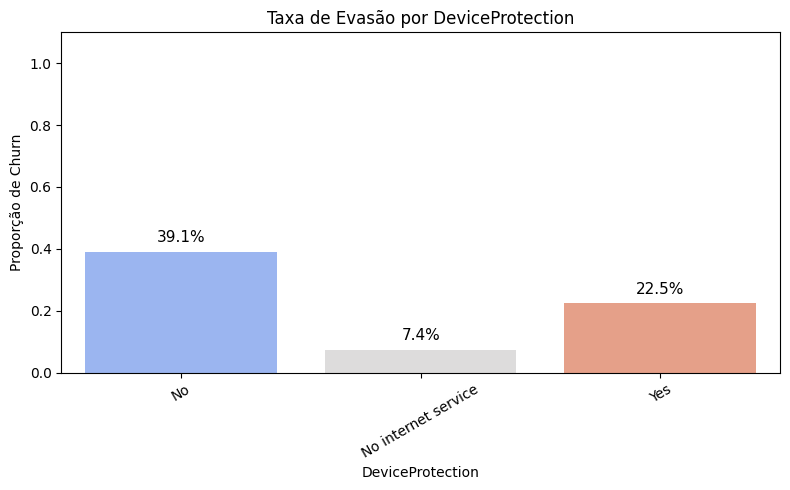

C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\3397064454.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=churn_percent, x=column, y='Churn_Rate', palette='coolwarm')


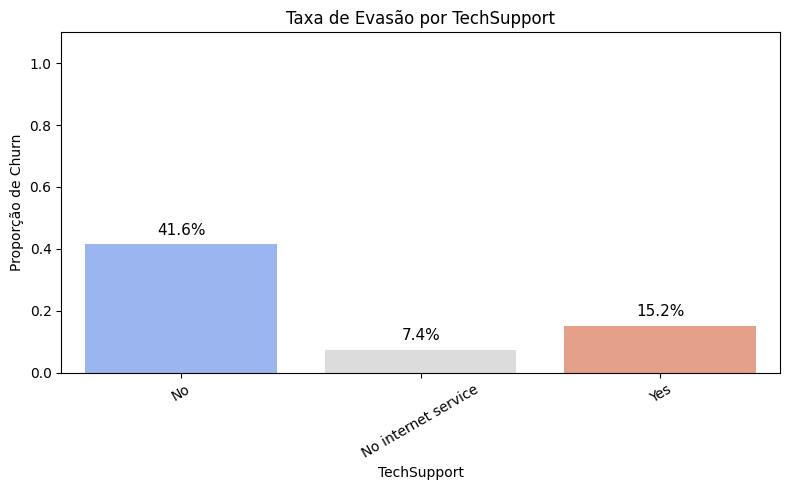

C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\3397064454.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=churn_percent, x=column, y='Churn_Rate', palette='coolwarm')


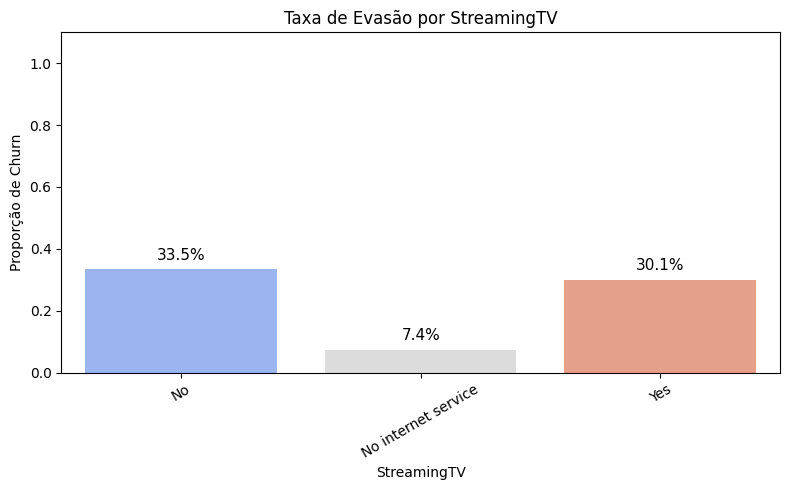

C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\3397064454.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=churn_percent, x=column, y='Churn_Rate', palette='coolwarm')


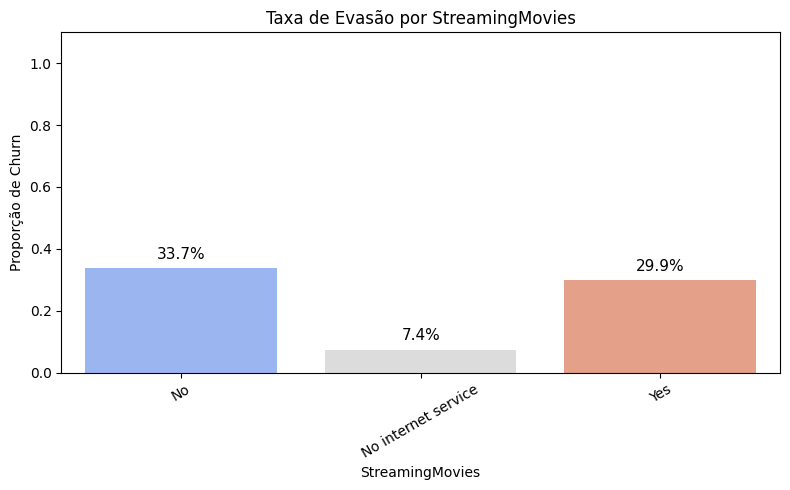

C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\3397064454.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=churn_percent, x=column, y='Churn_Rate', palette='coolwarm')


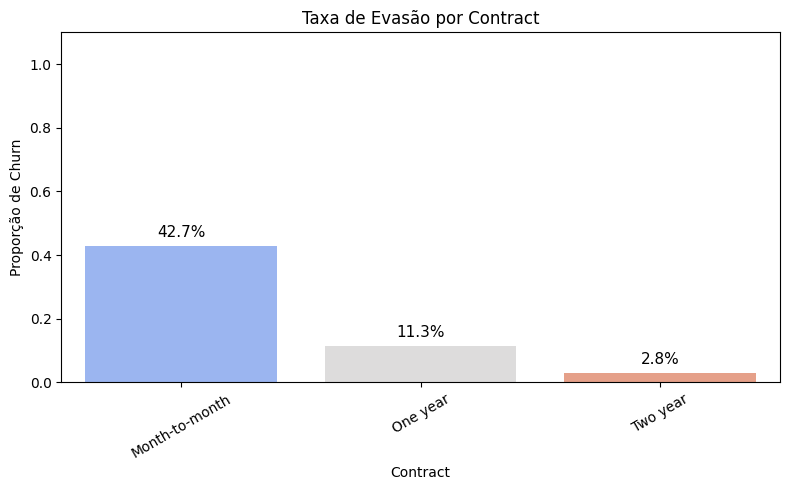

C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\3397064454.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=churn_percent, x=column, y='Churn_Rate', palette='coolwarm')


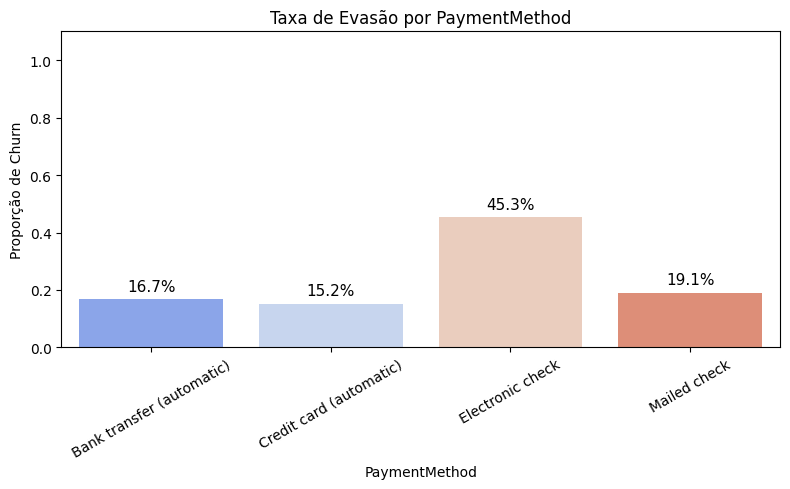

In [177]:
def plot_churn_percent_by_category(df, column):
    churn_percent = (
        df.groupby(column)['Churn']
        .mean()
        .reset_index()
        .rename(columns={'Churn': 'Churn_Rate'})
    )
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(data=churn_percent, x=column, y='Churn_Rate', palette='coolwarm')
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2,
                height + 0.02,
                f'{height:.1%}',
                ha='center', va='bottom', fontsize=11)
    plt.title(f'Taxa de Evasão por {column}')
    plt.ylabel('Proporção de Churn')
    plt.xlabel(column)
    plt.ylim(0, 1.1)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

categorical_cols = [col for col in df_clean.select_dtypes(include='object').columns
                    if df_clean[col].nunique() <= 10]

for col in categorical_cols:
    plot_churn_percent_by_category(df_clean, col)


C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\2959233744.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y=col, palette='Set2')


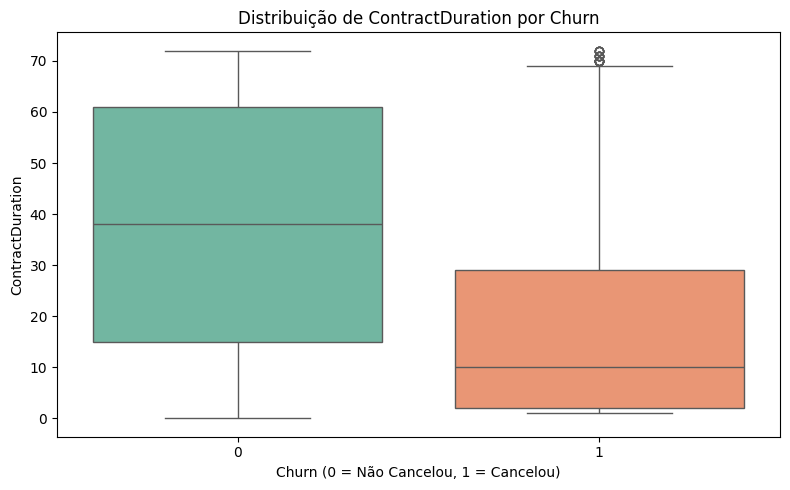

C:\Users\User W10\AppData\Local\Temp\ipykernel_10868\2959233744.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y=col, palette='Set2')


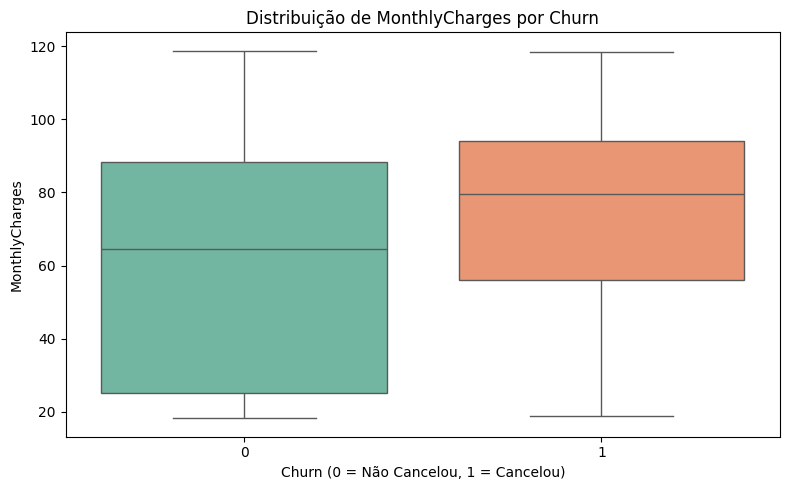

In [179]:
numerical_cols = ['ContractDuration', 'MonthlyCharges']

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_clean, x='Churn', y=col, palette='Set2')
    plt.title(f'Distribuição de {col} por Churn')
    plt.xlabel('Churn (0 = Não Cancelou, 1 = Cancelou)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


## 4. Conclusões e Insights

- A média geral de churn é de aproximadamente 26%.  
- Clientes com contrato mensal (`Month-to-month`), utilizando internet via fibra óptica e sem serviços adicionais de segurança e suporte, apresentam taxas de churn mais elevadas.  
- O método de pagamento via cheque eletrônico está associado a maior taxa de evasão.  
- Clientes com contratos mais curtos (`ContractDuration` baixo) e maiores gastos mensais (`MonthlyCharges`) têm maior propensão a cancelar.  
- A ausência de serviços como `OnlineSecurity`, `OnlineBackup`, `DeviceProtection` e `TechSupport` contribui para o aumento da evasão.



## 5. Recomendações

- Incentivar contratos de médio e longo prazo, oferecendo descontos e benefícios exclusivos para clientes novos.  
- Oferecer pacotes com serviços adicionais, especialmente para clientes com fibra óptica, para aumentar o valor percebido.  
- Melhorar o processo e comunicação do pagamento via cheque eletrônico, buscando aumentar a satisfação.  
- Monitorar clientes com maior gasto mensal e contratos recentes para estratégias de retenção personalizadas.  
- Implementar modelos preditivos para identificar clientes com alto risco de churn e agir preventivamente.
